In [ ]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To split the data into train & test set
from sklearn.model_selection import train_test_split
# To perform regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd

In [ ]:
#Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [ ]:
#Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
#Display basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


### ***There are no missing values in the dataset, and the data types are appropriate.***

In [ ]:
fuel_type = df['Fuel_Type'].value_counts().reset_index()
fuel_type

,Fuel_Type,count
0,Petrol,1264
1,Diesel,155
2,CNG,17


In [ ]:
#Convert the categorical variable 'Fuel_Type' into dummy variables
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


#### ***The Fuel_Type column was encoded using dummy variables, allowing categorical data to be included in the regression models.***

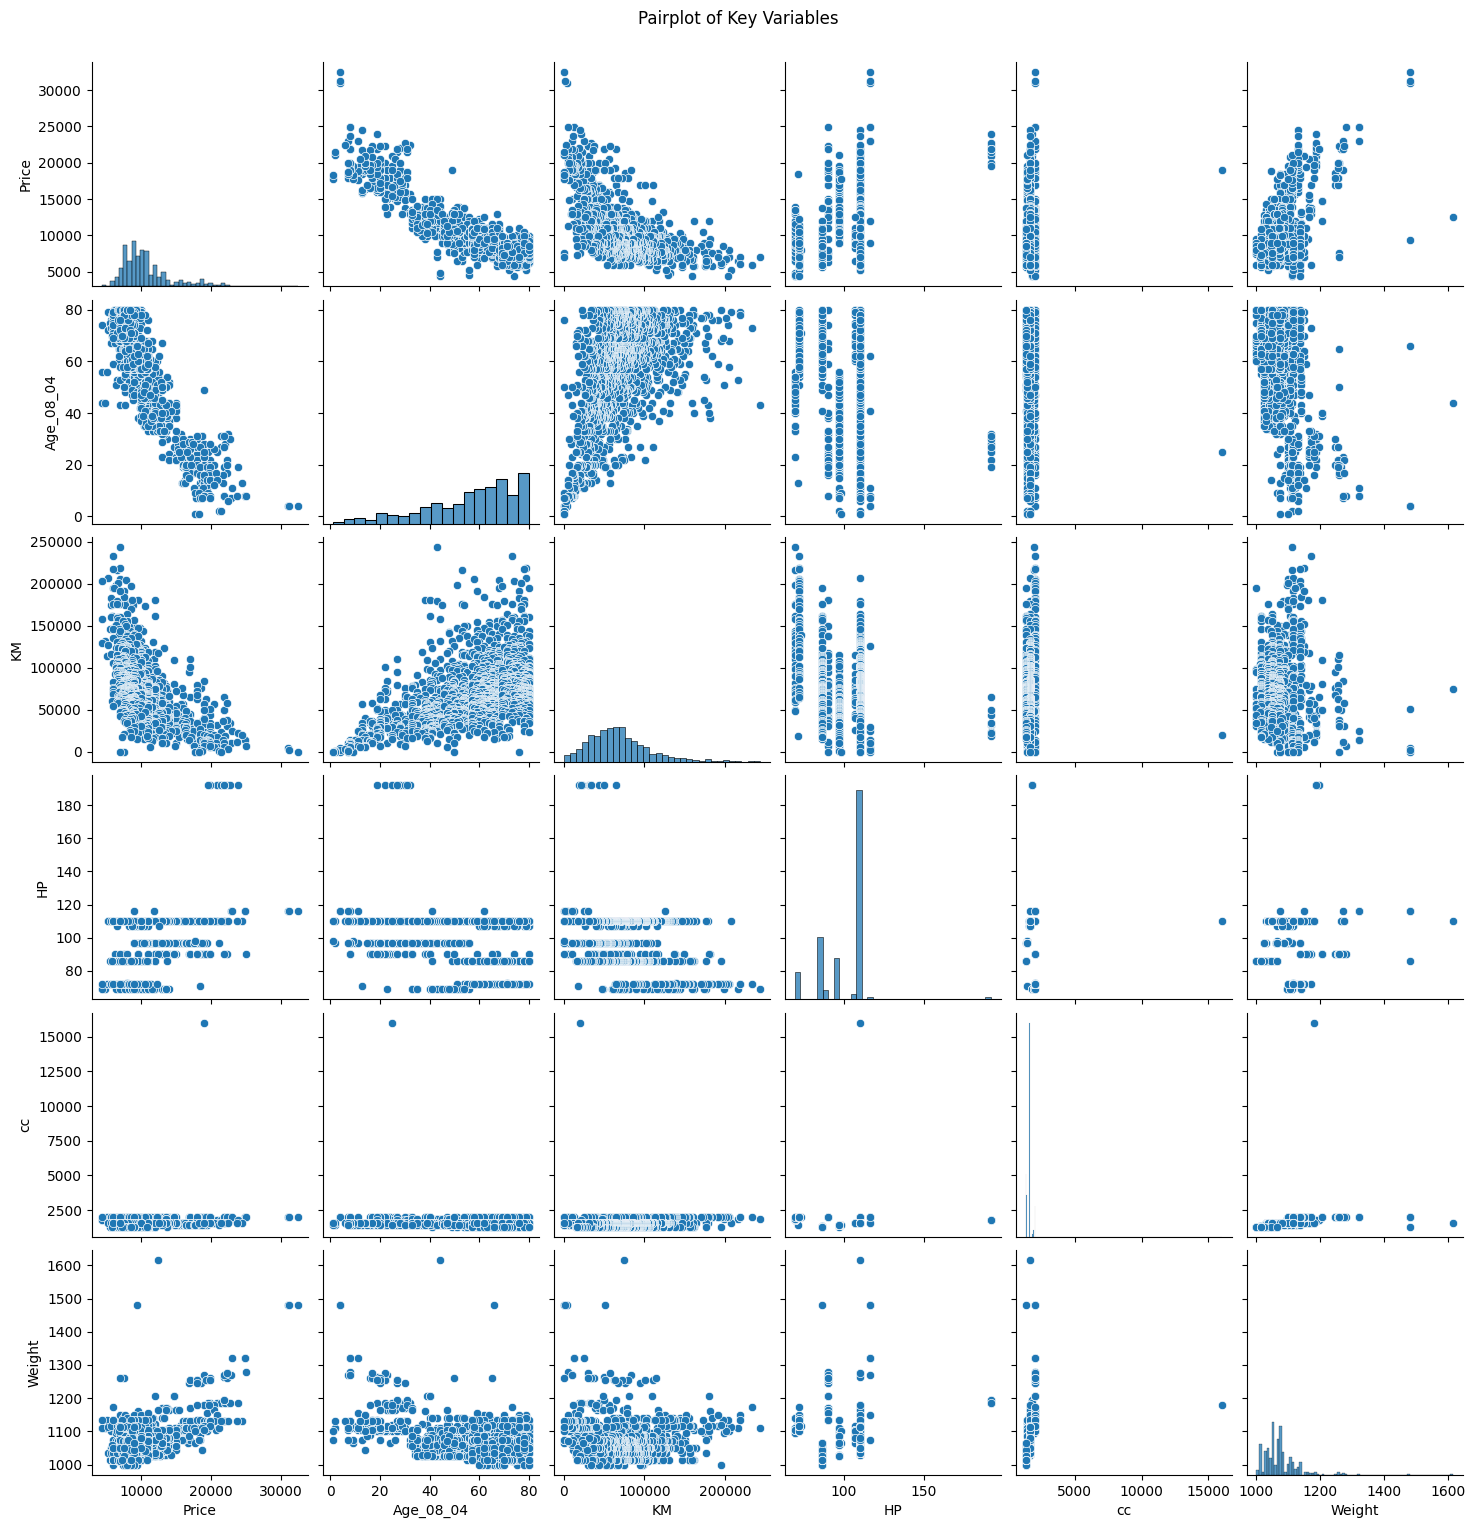

In [ ]:
# Exploratory Data Analysis - Visualizations
# Pairplot to visualize relationships between key variables
# use seaborn library to pairplot the key variables

sns.pairplot(df_encoded[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

#### ***Pair plots and correlation matrices helped visualize relationships between the features and the target variable (Price).***

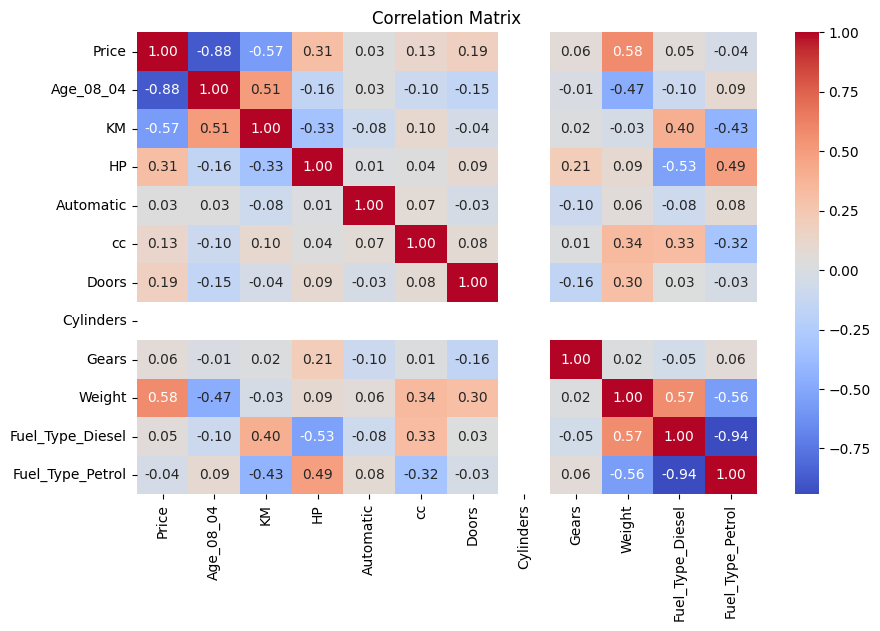

In [ ]:
# Correlation heatmap using seaborn library
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* **Age and kilometers (KM)** showed a negative correlation with Price, indicating that older cars or those with higher mileage tend to have lower prices.

* **Horsepower (HP) and weight** had a positive correlation with Price, implying that more powerful or heavier cars tend to be priced higher.


* **Fuel Type:** Differences in price were seen for cars with different fuel types (Diesel, Petrol, CNG).

In [ ]:
# Features or independent variables
# except the price column all relevant features such as Age, KM, HP, cc, and Weight were retained for modeling.
X = df_encoded.drop(columns=['Price'])

# Dependent variables
y = df_encoded['Price'] # price is to be predicted

## **2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will split the dataset into 80% training and 20% testing.

## **3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model.**

In [ ]:
#Build the first multiple linear regression model
lr_model = LinearRegression()  #Accessing the linear regression model
lr_model.fit(X_train, y_train) #Training the model

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)


In [ ]:
# Evaluate the model performance

#squared difference between the predicted and actual price
mse = mean_squared_error(y_test, y_pred)

#variance in dependent variable that is predictable from independent variable
r2 = r2_score(y_test, y_pred)


In [ ]:
# Get the coefficients of the model

coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])

## **4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

In [ ]:
print("Linear Regression Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(coefficients)


Linear Regression Model
Mean Squared Error: 2203043.8231437025
R-squared: 0.8348888040611082
                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
Automatic         1.488309e+02
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -1.620037e-12
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03


* Age: For each additional month of age, the car's price decreases by approximately 120 Euros.


* KM: For each additional kilometer driven, the price decreases slightly (by 0.016 Euros).

* HP: Horsepower has a positive effect on price, increasing by about 14 Euros per additional horsepower.

* Automatic: Automatic cars have a higher price, increasing by around 149 Euros compared to manual ones.

* Doors: A decrease in price by about 60 Euros per additional door.
Weight: Heavier cars tend to have higher prices, increasing by about 25.88 Euros per kilogram.

* Fuel Type: Diesel cars have slightly lower prices compared to CNG, while petrol cars have a significantly higher price (1370 Euros more).

**Linear Regression:**

The first model used basic multiple linear regression without regularization. The model fit the data well, explaining approximately 83.5% of the variance (R^2 = 0.835).

Key findings from the coefficients:


* Age and KM had a negative effect on price.

* Horsepower and Weight had a positive effect.

* Automatic cars tended to be priced slightly higher than manual cars.

* Fuel Type: Petrol cars had a significantly higher price compared to Diesel and CNG cars.

### **Build two more models: We will include Lasso and Ridge regularization.**

## **5.Apply Lasso and Ridge methods on the model.**

### ***Lasso regression was applied to reduce complexity and improve model performance by adding regularization (alpha = 0.1).***

 Helps in feature selection by shrinking the coefficients of less important features to zero.

In [ ]:
#Build the Lasso regression model
lasso_model = Lasso(alpha=0.1) # 0.1 regularization
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


In [ ]:
# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

### ***Ridge regression was also applied, which penalizes large coefficients to prevent overfitting. This model yielded similar results to linear and Lasso regression.***

Helps control the model’s complexity by reducing the magnitude of coefficients, but its effect was minimal, meaning that the linear model did not suffer from major overfitting.

In [ ]:
#Build the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


The models were evaluated using two key metrics:

**Mean Squared Error (MSE)**: Quantifies the average squared difference between the predicted and actual prices.


**R-squared (R²)**: Explains how much variance in the dependent variable (Price) is explained by the independent variables.

In [ ]:
# Printing the results for comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "MSE": [mse, mse_lasso, mse_ridge],
    "R2": [r2, r2_lasso, r2_ridge]
})

print(results)

               Model           MSE        R2
0  Linear Regression  2.203044e+06  0.834889
1   Lasso Regression  2.202270e+06  0.834947
2   Ridge Regression  2.202732e+06  0.834912


### **Conclusions:**

* The models built in this assignment provided a good fit for the data, with the linear regression model explaining 83.5% of the variance in car prices.

* Key factors affecting the price of a Toyota Corolla include the car’s age, mileage, horsepower, fuel type, and weight.

* Regularization techniques like Lasso and Ridge did not lead to significant improvements in model performance, indicating that the dataset does not suffer from serious overfitting.

This analysis provided valuable insights into the factors driving car prices and demonstrated the power of multiple linear regression models in predicting outcomes from multiple features.








### **1.What is Normalization & Standardization and how is it helpful?**

* Normalization (also known as min-max scaling) is the process of rescaling the data so that all feature values lie between a specific range, typically [0, 1].

* Standardization (or z-score normalization) transforms the data such that the mean becomes 0, and the standard deviation becomes 1. This results in features having a standard normal distribution (mean = 0, standard deviation = 1).

### ***How they are helpful ?***

* Both normalization and standardization are techniques used in data preprocessing to transform features before feeding them into machine learning models.

* Equal Scaling

* Improved Model Performance

* Prevention of Bias

* Consistent Output

### **2.What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated. This can lead to unstable estimates of regression coefficients, making it difficult to determine the individual effect of each predictor. Multicollinearity can increase the standard errors of the coefficients, leading to less reliable statistical inferences.

**Some techniques to address multicollinearity:**

1. Remove Highly Correlated Predictors (Manual Feature Selection)

2. Variance Inflation Factor (VIF) for Feature Selection

3. Principal Component Analysis (PCA)

4. Ridge Regression (L2 Regularization)

5. Lasso Regression (L1 Regularization)

6. Partial Least Squares (PLS)

7. Drop Redundant Variables Based on Domain Knowledge

8. Regularized Methods (Elastic Net)

9. Centering the Variables

